Azure Notebook Climate Change Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

Import data

In [2]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

Create a scatter plot of 1951-1980 data using matplotlib

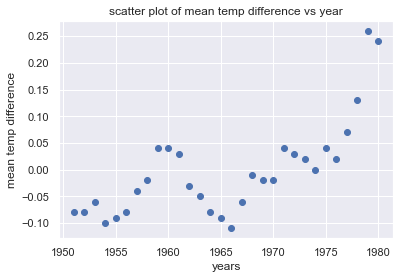

In [3]:
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

Perform linear regression

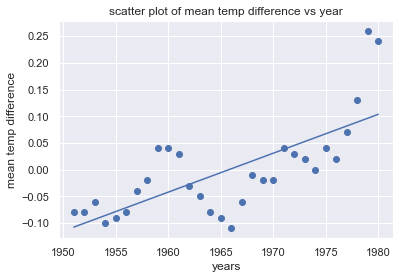

 y = 0.00727919911012223 * x + -14.309265850945241


In [4]:
# Creates a linear regression from the data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

Perform linear regression with scikit-learn

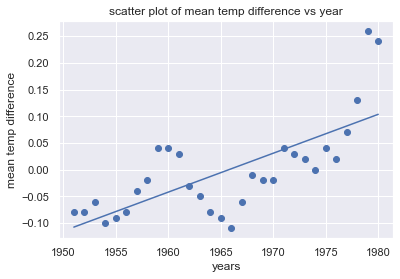

 y = 0.007279199110122355 * x + -14.30926585094549


In [5]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

# Fit/build the model
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

# Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

Perform linear regression with Seaborn

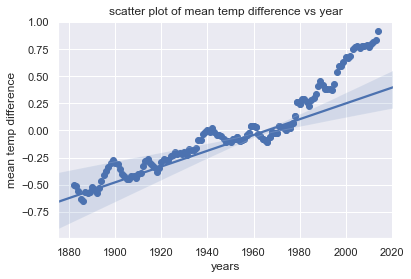

In [24]:
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(x=yearsBase, y=meanBase, truncate=False)
plt.show()

Microsoft tutorial uses old syntax and throws a warning, just change regplot arguments from just years, mean to x=years, y=mean. Also it seems that now by default replot sets data truncation to true so no predictions will be made from the 1951-1980 dataset unless one sets the truncate param to false